In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [28]:
user_knowledge <- read_excel("data/User_knowledge.xls", sheet = "Training_Data") %>%
select(STG, LPR, PEG, UNS) %>%
mutate(UNS = as.factor(UNS)) 
colnames(user_knowledge) <- c("study_time", "related_perf", "exam_perf", "knowledge")
user_knowledge

New names:
* `` -> ...7
* `` -> ...8



study_time,related_perf,exam_perf,knowledge
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,very_low
0.08,0.24,0.90,High
0.06,0.25,0.33,Low
0.10,0.65,0.30,Middle
0.08,0.98,0.24,Low
0.09,0.10,0.66,Middle
0.10,0.29,0.56,Middle
0.15,0.40,0.01,very_low
0.20,0.72,0.25,Low


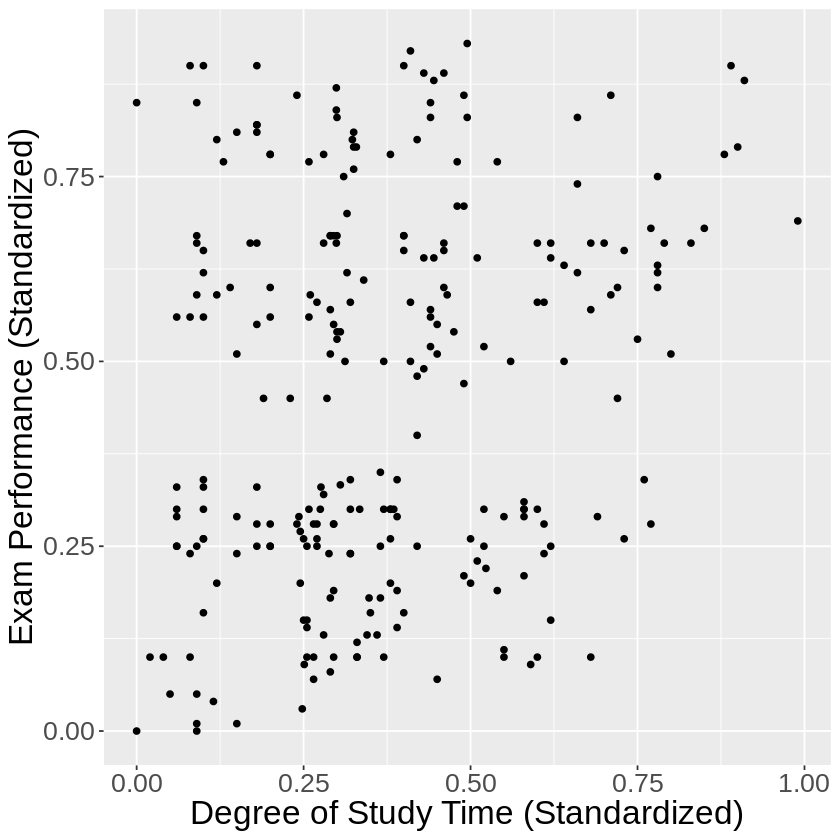

In [36]:
user_plot <- user_knowledge %>%
            ggplot(aes(x = study_time, y = exam_perf)) +
            geom_point() +
            labs(x = "Degree of Study Time (Standardized)", y = "Exam Performance (Standardized)") +
            theme(text = element_text(size = 20))
user_plot